In [3]:
import numpy as np
import matplotlib.pyplot as plt
from procesadoDatosPrecioString import procesar_datos_string 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [4]:
datos = procesar_datos_string()
datos
labels = list(datos.index)

Archivo donde están los datos del precio (sin extensión): precio


In [5]:
datos = datos.to_numpy()

In [6]:
datos = normalize(datos)

In [7]:
len(datos[0])

24

In [9]:
score_list = []
maximo = (0,0)
for x in range(2,20):
    clusterer = KMeans(n_clusters=x, random_state=1)
    cluster_labels = clusterer.fit_predict(datos)
    score = silhouette_score(datos, cluster_labels)
    score_list.append(score)
    if score > maximo[1]:
        maximo = (x, score)

El maximo se obtiene en el nodo 2 con una puntuacion de 0.2792197086604209


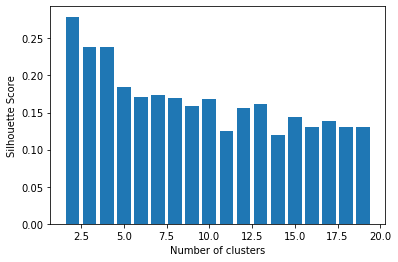

In [10]:
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.bar([x for x in range(2, 20, 1)], score_list)
print("El maximo se obtiene en el nodo {} con una puntuacion de {}".format(maximo[0], maximo[1]))